# What happens to the placement of prime numbers in unfounded expressions?

## おまけページ

「ウラムの螺旋」を発展させたものとは関係なしのネタ。


In [1]:
import numpy as np

def choice_prime_num(arr):
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

def divied_colors(size, prime_num):
    colors = []
    for num in range(len(size)):
        if num in prime_num:
            colors.append('lime')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('slategray')
    return colors


## おまけ　その１  

模様が美しいです

<IPython.core.display.Javascript object>


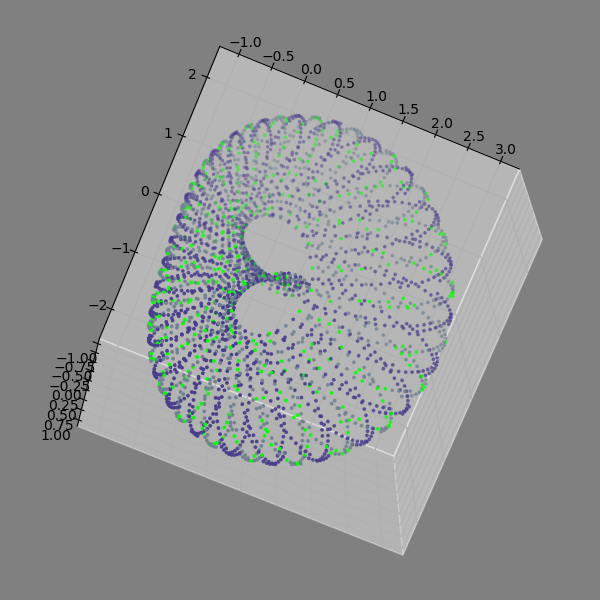

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Maximum number of integers to handle
SIZE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(SIZE))


### Try switching "rad". ###

#rad = np.exp(-np.pi)
# rad = np.e
#rad = (np.e / 2) * np.pi ##ヒモになる
rad = np.e / (2 * np.pi)
#rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)
# rad = np.e**(np.pi) / (np.pi**np.e)
#rad = (np.pi**np.e) / (np.e**(-np.pi))
#rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi)) 
# rad = (2 * np.pi) / np.e**2
#rad = 2 / (np.e*np.pi)
#rad = np.pi**np.e
# rad = 2**np.e*np.pi
# rad = (2*np.e)**np.pi

def make_arr(arr, r):
    grad = np.sqrt(arr[0]**2 + arr[1]**2)
    arr2 = np.array([grad  + np.cos(r), 0, np.sin(r)])
    matrix = np.array([
        [np.cos(r), np.sin(r), 0],
        [-np.sin(r), np.cos(r), 0],
        [0, 0, 1]
    ])
    res =  matrix.dot(arr2)
    return res

def plot_3d(size, prime_num, rad):
    radius = lambda n: n*np.e  
    colors = divied_colors(size, prime_num)

    theta = rad * size
    comp =  1 - 1j ** (np.e * size)
    
    ax_x = comp.real
    ax_y = comp.imag
    ax1 = np.stack([ax_x, ax_y])
    ax3 = ax1.T
    res = []
    for a, r in zip(ax3, theta):
        res.append(make_arr(a, r))
    
    arr = np.array(res).T
    
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)
    ax.set_facecolor('gray')
    ax.scatter(arr[0], arr[1], arr[2], s=3, c=colors)

    #plt.show()

plot_3d(SIZE, PRIME_NUM, rad)

## おまけ　その２  

筒状になります

<IPython.core.display.Javascript object>


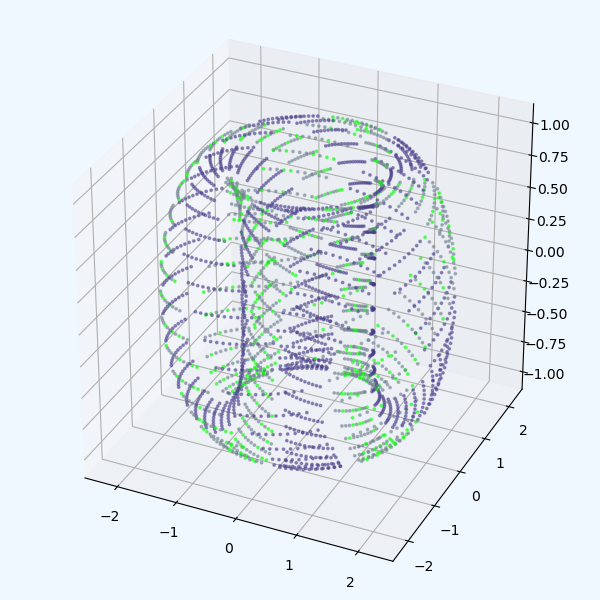

In [19]:
## 整数を使わないパターン　おまけ
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

INT_RANGE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

### Try switching "rad". ###

# rad = np.e
# rad = (np.e / 2) * np.pi
#rad = np.e / (2 * np.pi)
#rad = np.e**(2 * np.pi) / (2 * np.pi**np.e)
# rad = np.e**(np.pi) / (np.pi**np.e)
# rad = (np.pi**np.e) / (np.e**(-np.pi))
rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi)) 
# rad = (2 * np.pi) / np.e**2
#rad = 2 / (np.e*np.pi)
#rad = np.pi**np.e
# rad = 2**np.e*np.pi
#rad = (2*np.e)**np.pi


def make_plot_arr(arr1, arr2, theta):
    grad = np.sqrt(arr1[0]**2 + arr1[1]**2)
    arr = np.array([grad, arr2[0], arr2[1]])
    matrix = np.array([
        [np.cos(theta), np.sin(theta), 0],
        [-np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

    res =  matrix.dot(arr)
    return res


def plot_2(int_range, prime_num, rad):
    
    comp_num =  1 - 1j ** (np.e * int_range)
    
    theta = rad * int_range
    
    ax1_x = np.cos(theta)
    ax1_y = np.sin(theta)

    ax2_x = comp_num.real
    ax2_y = comp_num.imag    
#    ax2_x = comp_num.real * np.e
#    ax2_y = comp_num.imag * np.e
#    ax2_x = comp_num.real / np.pi
#    ax2_y = comp_num.imag / np.pi
    
    ax1 = np.stack([ax1_x, ax1_y]).T
    ax2 = np.stack([ax2_x, ax2_y]).T
       
    plots = []
    for arr1, arr2, r in zip(ax1, ax2, theta):
        plots.append(make_plot_arr(arr1, arr2, r))

    cood = np.array(plots).T

    colors = divied_colors(int_range, prime_num)
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig)
    ax.set_facecolor('aliceblue')
    ax.scatter(cood[0], cood[1], cood[2], s=3, c=colors, alpha=0.5)

    plt.show()
    
plot_2(INT_RANGE, PRIME_NUM, rad)